### Añadimos SRC a la raíz del proyecto para poder importar el contenido

In [71]:
import sys
import os

# Obtener la ruta absoluta de la carpeta raíz (donde está src)
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Subir un nivel desde notebooks/

# Agregar la carpeta src al path
sys.path.append(os.path.join(ROOT_DIR, "src"))

### Importamos los módulos necesarios

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

## Visualizar algunas Distribuciones

### 📂 Cargar el dataset

In [73]:
file_path = "../data/victory_road_scraping/pokemon_dataset_full_merged.csv"
df = pd.read_csv(file_path)

### 🔍 Información General

In [74]:
print("🔍 Información General del Dataset:")
df.info()

🔍 Información General del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  1303 non-null   int64 
 1   name                   1303 non-null   object
 2   type1                  1303 non-null   object
 3   type2                  1303 non-null   object
 4   ability1               1303 non-null   object
 5   ability2               1303 non-null   object
 6   hidden_ability         1303 non-null   object
 7   height                 1303 non-null   int64 
 8   weight                 1303 non-null   int64 
 9   hp                     1303 non-null   int64 
 10  attack                 1303 non-null   int64 
 11  defense                1303 non-null   int64 
 12  sp_atk                 1303 non-null   int64 
 13  sp_def                 1303 non-null   int64 
 14  speed                  1303 non-null 

### 🔍 Primeras filas del dataset

In [75]:
print("\n🔍 Primeras filas del dataset:")
df.head()


🔍 Primeras filas del dataset:


,index,name,type1,type2,ability1,ability2,hidden_ability,height,weight,hp,...,total_stats,legendary,mythical,generation,Smogon_VGC_Usage_2022,Smogon_VGC_Usage_2023,Smogon_VGC_Usage_2024,Worlds_VGC_Usage_2024,Worlds_VGC_Usage_2023,Worlds_VGC_Usage_2022
0,1,bulbasaur,grass,poison,overgrow,No_ability,chlorophyll,0,6,45,...,318,False,False,generation-i,0.0,NoUsage,0.0,NoUsage,NoUsage,NoUsage
1,2,ivysaur,grass,poison,overgrow,No_ability,chlorophyll,1,13,60,...,405,False,False,generation-i,0.0,NoUsage,0.0,NoUsage,NoUsage,NoUsage
2,3,venusaur,grass,poison,overgrow,No_ability,chlorophyll,2,100,80,...,525,False,False,generation-i,20.83915,NoUsage,0.4441,0.09,NoUsage,19.62
3,3,venusaur-mega,grass,poison,thick-fat,No_ability,None,2,155,80,...,625,False,False,generation-i,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage
4,3,venusaur-gmax,grass,poison,overgrow,No_ability,chlorophyll,24,1000,80,...,525,False,False,generation-i,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage


### 🔍 Descripción estadística del dataset

In [76]:
print("\n📊 Resumen Estadístico:")
df.describe(include="all")


📊 Resumen Estadístico:


,index,name,type1,type2,ability1,ability2,hidden_ability,height,weight,hp,...,total_stats,legendary,mythical,generation,Smogon_VGC_Usage_2022,Smogon_VGC_Usage_2023,Smogon_VGC_Usage_2024,Worlds_VGC_Usage_2024,Worlds_VGC_Usage_2023,Worlds_VGC_Usage_2022
count,1303.000000,1303,1303,1303,1303,1303,1303,1303.000000,1303.000000,1303.000000,...,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,NaN,1303,18,19,251,134,171,NaN,NaN,NaN,...,NaN,2,2,9,319,357,448,92,83,76
top,NaN,pecharunt,water,No_type,levitate,No_ability,None,NaN,NaN,NaN,...,NaN,False,False,generation-i,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage
freq,NaN,1,158,576,42,689,300,NaN,NaN,NaN,...,NaN,1186,1269,233,603,679,509,1115,1156,1146
mean,507.049117,NaN,NaN,NaN,NaN,NaN,NaN,1.623177,97.784344,71.345357,...,445.959325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,305.094864,NaN,NaN,NaN,NaN,NaN,NaN,5.481289,197.258734,26.881097,...,119.953360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,...,175.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,234.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,8.500000,54.000000,...,335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,511.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,31.000000,70.000000,...,470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,774.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,81.000000,85.000000,...,525.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🔍 Valores nulos en el dataset

In [77]:
print("\n⚠️ Valores Nulos por columna:")
df.isnull().sum()


⚠️ Valores Nulos por columna:


index                    0
name                     0
type1                    0
type2                    0
ability1                 0
ability2                 0
hidden_ability           0
height                   0
weight                   0
hp                       0
attack                   0
defense                  0
sp_atk                   0
sp_def                   0
speed                    0
total_stats              0
legendary                0
mythical                 0
generation               0
Smogon_VGC_Usage_2022    0
Smogon_VGC_Usage_2023    0
Smogon_VGC_Usage_2024    0
Worlds_VGC_Usage_2024    0
Worlds_VGC_Usage_2023    0
Worlds_VGC_Usage_2022    0
dtype: int64

### 🔍 Distribución de los Tipos de Datos

In [78]:
print("\n🔍 Tipos de Datos en el Dataset:")
df.dtypes.value_counts()


🔍 Tipos de Datos en el Dataset:


object    13
int64     10
bool       2
Name: count, dtype: int64

### 📈 Visualización de valores nulos

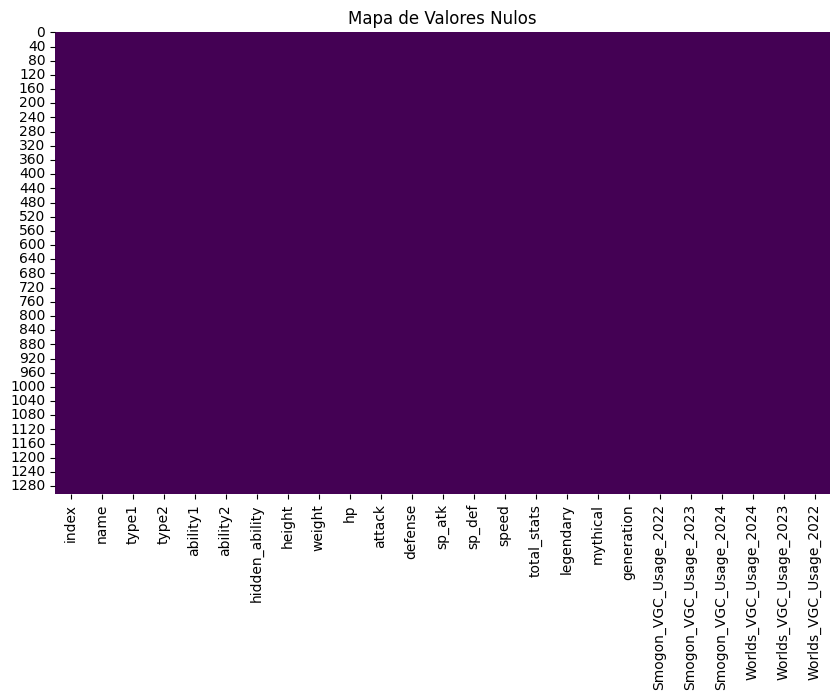

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()

### 📈 Distribución de Estadísticas Base

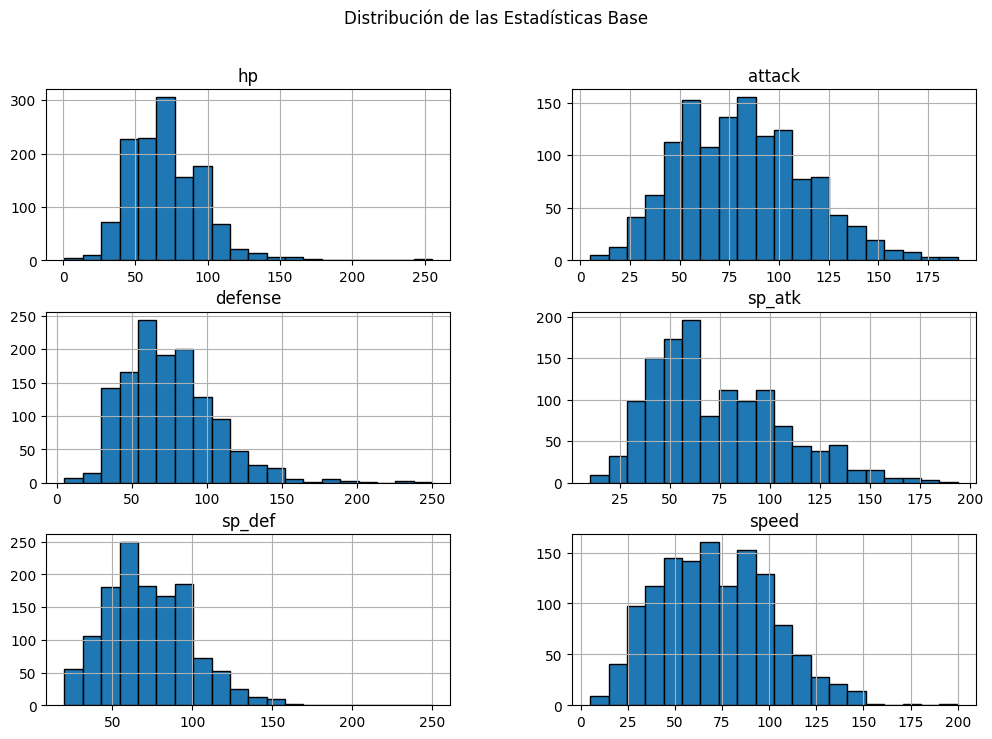

In [80]:
stats_columns = ["hp", "attack", "defense", "sp_atk", "sp_def", "speed"]
df[stats_columns].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribución de las Estadísticas Base")
plt.show()

### 📈 Boxplot de las estadísticas base para detectar valores atípicos

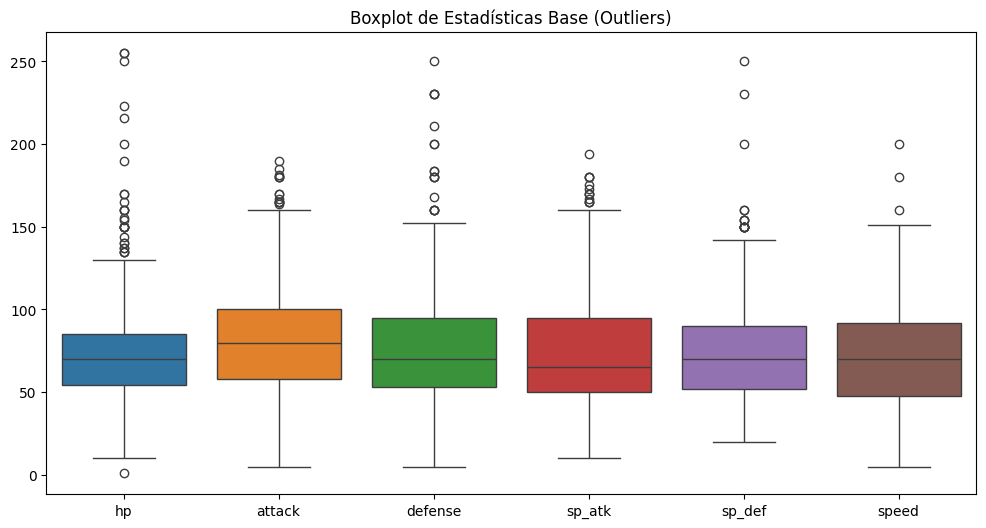

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[stats_columns])
plt.title("Boxplot de Estadísticas Base (Outliers)")
plt.show()

### 🔍 Análisis de Uso Competitivo (Smogon & VGC)

In [82]:
usage_columns = [col for col in df.columns if "Usage" in col]
print("\n🔍 Resumen de Uso Competitivo:")
df[usage_columns].describe()


🔍 Resumen de Uso Competitivo:


,Smogon_VGC_Usage_2022,Smogon_VGC_Usage_2023,Smogon_VGC_Usage_2024,Worlds_VGC_Usage_2024,Worlds_VGC_Usage_2023,Worlds_VGC_Usage_2022
count,1303,1303,1303,1303,1303,1303
unique,319,357,448,92,83,76
top,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage,NoUsage
freq,603,679,509,1115,1156,1146


# 📊 Análisis Visual del Uso de Pokémon en Competitivo (Smogon vs VGC Worlds)

## 📈 Top 10 Pokémon más usados en Smogon y VGC

In [ ]:
# 📂 Cargar el dataset
df = pd.read_csv("../data/victory_road_scraping/pokemon_dataset_full_merged.csv")

# 🔎 Detectar columnas de uso
usage_columns = [col for col in df.columns if "Usage" in col]

# 🔄 Convertir "NoUsage" a 0.0 y transformar a float
for col in usage_columns:
    df[col] = df[col].replace("NoUsage", 0.0).astype(float)

# 🔍 Verificar la conversión
print("\n🔎 Tipos de datos después de conversión:")
print(df[usage_columns].dtypes)

# 🔎 Verificar si los valores se han convertido correctamente
print("\n🔎 Ejemplo de valores después de conversión:")
print(df[usage_columns].head(10))

# 📁 Guardar el dataset corregido
df.to_csv("../data/victory_road_scraping/pokemon_dataset_fixed.csv", index=False)
print("\n✅ Dataset corregido guardado como 'pokemon_dataset_fixed.csv'")



🔎 Tipos de datos después de conversión:
Smogon_VGC_Usage_2022    float64
Smogon_VGC_Usage_2023    float64
Smogon_VGC_Usage_2024    float64
Worlds_VGC_Usage_2024    float64
Worlds_VGC_Usage_2023    float64
Worlds_VGC_Usage_2022    float64
dtype: object

🔎 Ejemplo de valores después de conversión:
   Smogon_VGC_Usage_2022  Smogon_VGC_Usage_2023  Smogon_VGC_Usage_2024  \
0                0.00000                0.00000                0.00000   
1                0.00000                0.00000                0.00000   
2               20.83915                0.00000                0.44410   
3                0.00000                0.00000                0.00000   
4                0.00000                0.00000                0.00000   
5                0.00000                0.00000                0.00000   
6                0.00000                0.00000                0.00000   
7                7.17374                0.44681                0.04722   
8                0.00000            

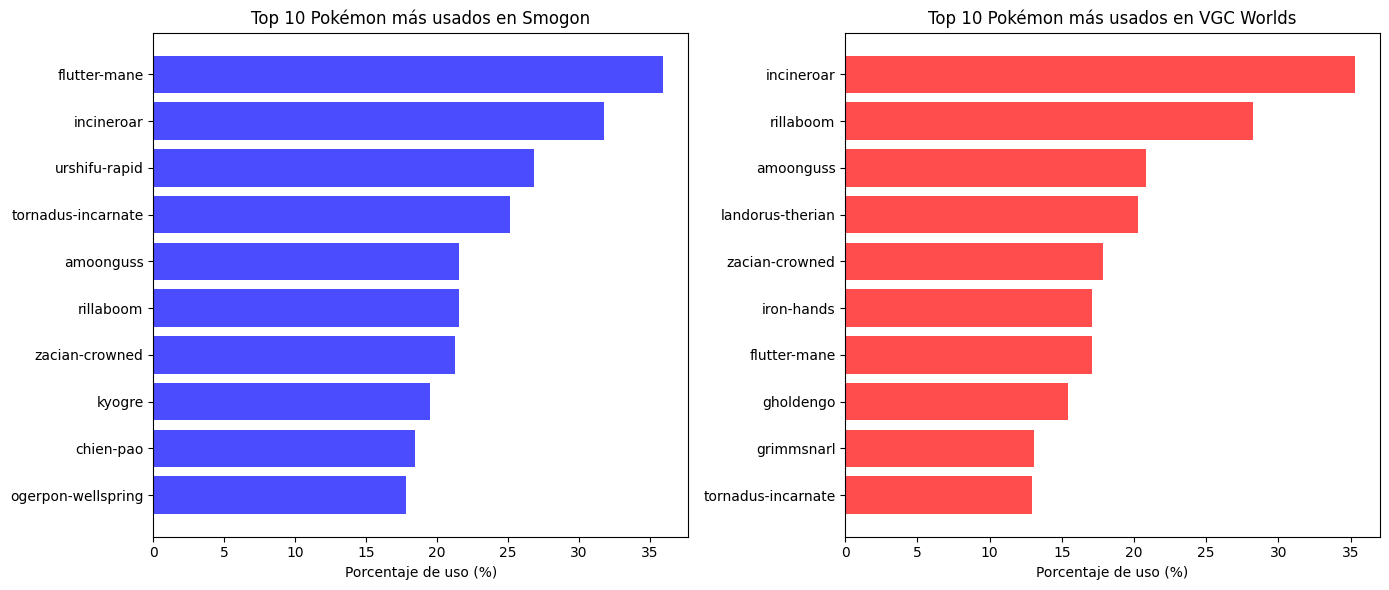

In [84]:
# 📂 Cargar el dataset corregido
df = pd.read_csv("../data/victory_road_scraping/pokemon_dataset_fixed.csv")

# 🔎 Detectar columnas de uso
smogon_usage_cols = ["Smogon_VGC_Usage_2022", "Smogon_VGC_Usage_2023", "Smogon_VGC_Usage_2024"]
vgc_usage_cols = ["Worlds_VGC_Usage_2022", "Worlds_VGC_Usage_2023", "Worlds_VGC_Usage_2024"]

# 🔄 Calcular el promedio de uso en cada formato
df["Avg_Smogon_Usage"] = df[smogon_usage_cols].mean(axis=1)
df["Avg_Worlds_Usage"] = df[vgc_usage_cols].mean(axis=1)

# 🔎 Seleccionar los 10 Pokémon más usados en cada formato
top_smogon = df.nlargest(10, "Avg_Smogon_Usage")[["name", "Avg_Smogon_Usage"]]
top_vgc = df.nlargest(10, "Avg_Worlds_Usage")[["name", "Avg_Worlds_Usage"]]

# 📊 Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 Gráfico de Smogon
axes[0].barh(top_smogon["name"], top_smogon["Avg_Smogon_Usage"], color="blue", alpha=0.7)
axes[0].invert_yaxis()
axes[0].set_xlabel("Porcentaje de uso (%)")
axes[0].set_title("Top 10 Pokémon más usados en Smogon")

# 🔹 Gráfico de VGC (Worlds)
axes[1].barh(top_vgc["name"], top_vgc["Avg_Worlds_Usage"], color="red", alpha=0.7)
axes[1].invert_yaxis()
axes[1].set_xlabel("Porcentaje de uso (%)")
axes[1].set_title("Top 10 Pokémon más usados en VGC Worlds")

plt.tight_layout()
plt.show()

#### Esta visualización muestra los 10 Pokémon más usados en Smogon y en VGC, es decir, los que más veces han aparecido en equipos competitivos en los últimos 3 años.

🔍 ¿Qué información nos da esta gráfica?

Nos permite ver si hay coincidencias entre los Pokémon más usados en cada formato.
Podemos notar si algunos Pokémon son muy populares en ambos formatos o si hay diferencias marcadas en las preferencias de los jugadores de Smogon y VGC.
Nos ayuda a entender qué Pokémon dominan cada metajuego.

📌 ¿Por qué es interesante?

Cada formato tiene reglas diferentes y formas distintas de jugar, por lo que los Pokémon más utilizados en un formato pueden ser poco comunes en el otro. Con esta gráfica podemos comparar de manera visual cómo se ven estas diferencias.

## 📈 Comparación Smogon vs. VGC (Scatter Plot)

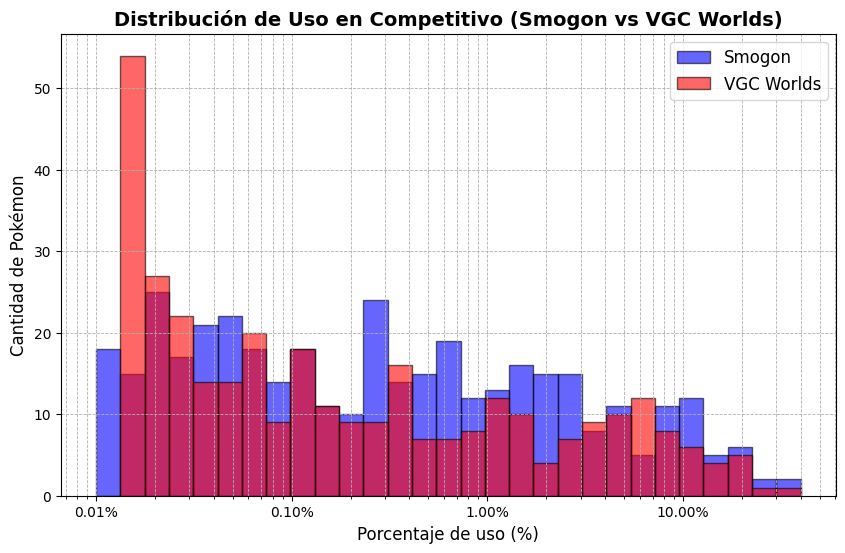

In [86]:
# 📂 Cargar el dataset corregido
df = pd.read_csv("../data/victory_road_scraping/pokemon_dataset_fixed.csv")

# 🔎 Detectar columnas de uso
smogon_usage_cols = ["Smogon_VGC_Usage_2022", "Smogon_VGC_Usage_2023", "Smogon_VGC_Usage_2024"]
vgc_usage_cols = ["Worlds_VGC_Usage_2022", "Worlds_VGC_Usage_2023", "Worlds_VGC_Usage_2024"]

# 🔄 Calcular el promedio de uso en cada formato
df["Avg_Smogon_Usage"] = df[smogon_usage_cols].mean(axis=1)
df["Avg_Worlds_Usage"] = df[vgc_usage_cols].mean(axis=1)

# 🔹 **Eliminar Pokémon con uso 0 en ambos formatos**
df_filtered = df[(df["Avg_Smogon_Usage"] > 0) | (df["Avg_Worlds_Usage"] > 0)]

# 📊 **Visualización de la distribución de uso**
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.logspace(np.log10(0.01), np.log10(40), 30)  # Escala logarítmica

ax.hist(df_filtered["Avg_Smogon_Usage"], bins=bins, alpha=0.6, label="Smogon", color="blue", edgecolor="black")
ax.hist(df_filtered["Avg_Worlds_Usage"], bins=bins, alpha=0.6, label="VGC Worlds", color="red", edgecolor="black")

ax.set_xlabel("Porcentaje de uso (%)", fontsize=12)
ax.set_ylabel("Cantidad de Pokémon", fontsize=12)
ax.set_title("Distribución de Uso en Competitivo (Smogon vs VGC Worlds)", fontsize=14, fontweight='bold')
ax.set_xscale("log")  # Aplicar escala logarítmica en el eje X
ax.legend(fontsize=12)

# 🔹 **Modificar el formato de los ticks del eje X**
def log_tick_formatter(val, pos):
    return f"{val:.2f}%"

ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
ax.grid(True, which="both", linestyle="--", linewidth=0.6)

plt.show()



#### Esta segunda gráfica nos da una visión mucho más global, ya que no se centra solo en los 10 Pokémon más usados, sino en TODOS los Pokémon y cómo se distribuye su uso en los dos formatos.

🔍 ¿Qué nos dice esta gráfica?

En el eje X (horizontal), tenemos el porcentaje de uso de los Pokémon.
A la izquierda de la gráfica están los Pokémon que casi no se usan.
A la derecha están los Pokémon que se usan muchísimo en competitivo.
En el eje Y (vertical), tenemos la cantidad de Pokémon con cada porcentaje de uso.
Los picos en la gráfica nos dicen cuántos Pokémon tienen un uso similar.

📌 ¿Qué se observa en esta gráfica?

✔ La mayoría de los Pokémon tienen un uso muy bajo.

En ambos formatos (Smogon y VGC), la mayoría de los Pokémon se usan muy poco (están en el lado izquierdo del gráfico).
Esto es normal porque en competitivo, los jugadores usan solo los mejores Pokémon y muchos otros quedan fuera del metajuego.

✔ Un grupo reducido de Pokémon domina el metajuego.

A medida que nos movemos hacia la derecha en la gráfica, el número de Pokémon disminuye, lo que significa que solo unos pocos Pokémon tienen un uso muy alto en los torneos.

✔ Diferencias entre Smogon y VGC.

La gráfica nos permite ver cómo se distribuye el uso de Pokémon en cada formato y si hay Pokémon que dominan en uno pero no en el otro.
Si hay grandes diferencias en la distribución, significa que los metajuegos son muy distintos.

🧐 ¿Por qué hemos usado una escala logarítmica en la segunda gráfica?

Los datos de uso de Pokémon tienen una distribución desigual: hay algunos Pokémon que se usan muchísimo y otros que casi no se usan.
Si usáramos una escala normal, la gráfica estaría aplastada y no se verían bien las diferencias.
Con una escala logarítmica, podemos ver con más claridad cómo se agrupan los Pokémon según su popularidad.

##  📈 Comparación de los Pokémon más dominantes en cada formato

<Figure size 1200x600 with 0 Axes>

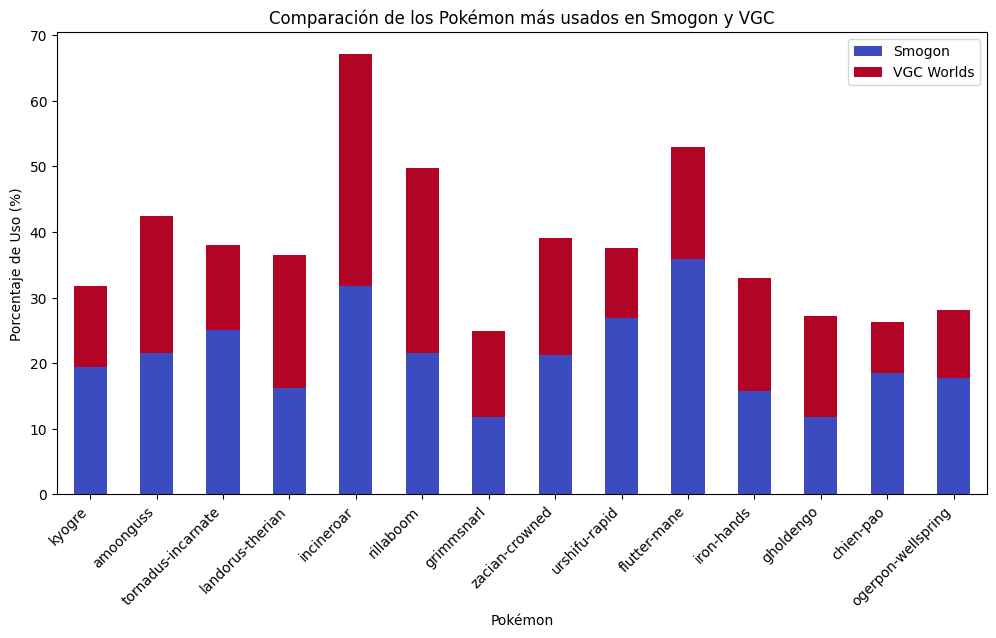

In [87]:
# Ajustar nombres según el dataset actual
smogon_col = "Avg_Smogon_Usage"  
vgc_col = "Avg_Worlds_Usage" 

# Seleccionar los 10 Pokémon más usados en Smogon y VGC
top_smogon = df.nlargest(10, smogon_col)[["name", smogon_col]]
top_vgc = df.nlargest(10, vgc_col)[["name", vgc_col]]

# Unir los dos conjuntos
top_pokemon = set(top_smogon["name"]).union(set(top_vgc["name"]))

# Crear un DataFrame con estos Pokémon
df_top = df[df["name"].isin(top_pokemon)][["name", smogon_col, vgc_col]]

# Configurar la visualización
plt.figure(figsize=(12, 6))
df_top.set_index("name").plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.ylabel("Porcentaje de Uso (%)")
plt.xlabel("Pokémon")
plt.title("Comparación de los Pokémon más usados en Smogon y VGC")
plt.xticks(rotation=45, ha="right")
plt.legend(["Smogon", "VGC Worlds"])
plt.show()


📌 ¿Qué representa?

Este histograma muestra cómo se distribuye el uso de los Pokémon en cada formato, es decir, cuántos Pokémon son muy usados y cuántos tienen un uso marginal.

📌 Interpretación:

Nos permite ver si el metajuego está dominado por pocos Pokémon o si hay una mayor variedad de opciones.
Si hay una gran concentración en la parte baja, significa que solo pocos Pokémon tienen un uso alto y la mayoría tiene un uso bajo.
Si la distribución es más uniforme, significa que hay más diversidad en el competitivo.

📌 ¿Qué esperar en los datos?

En VGC, suele haber menos diversidad porque los equipos están optimizados para ganar torneos.
En Smogon, hay más variedad, ya que hay tiers y diferentes niveles de juego.

## 📈 Relación entre uso en Smogon y VGC Worlds

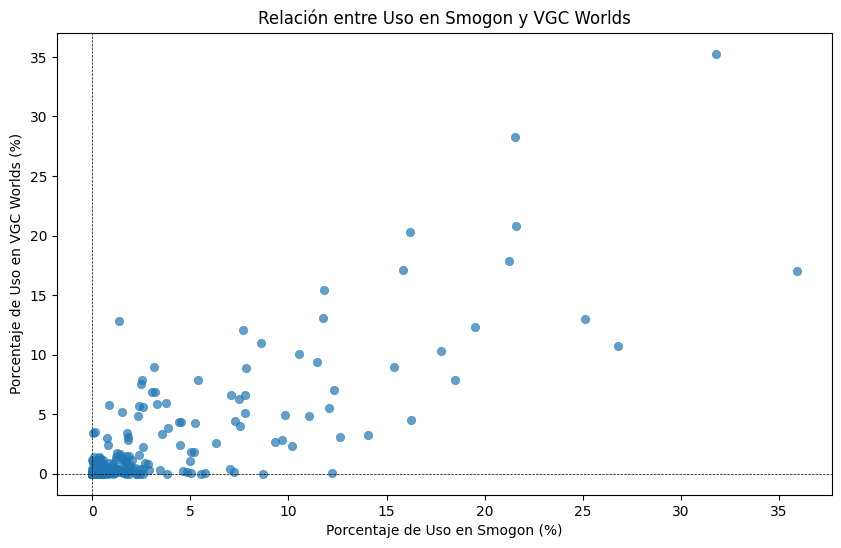

In [88]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfico de dispersión
sns.scatterplot(
    data=df, 
    x="Avg_Smogon_Usage", 
    y="Avg_Worlds_Usage", 
    alpha=0.7, 
    edgecolor=None
)

# Ajustar etiquetas y título
plt.xlabel("Porcentaje de Uso en Smogon (%)")
plt.ylabel("Porcentaje de Uso en VGC Worlds (%)")
plt.title("Relación entre Uso en Smogon y VGC Worlds")
plt.axhline(y=0, color='black', linewidth=0.5, linestyle="--")  # Línea base en Y
plt.axvline(x=0, color='black', linewidth=0.5, linestyle="--")  # Línea base en X

# Mostrar gráfico
plt.show()


📌 ¿Qué representa?

Este gráfico de dispersión es otra forma de visualizar la relación entre Smogon y VGC, pero en este caso destaca qué Pokémon tienen valores extremos en cada formato.

📌 Interpretación:

Nos ayuda a ver qué Pokémon se usan mucho en un formato pero casi nada en el otro.
Si un Pokémon está muy a la derecha pero muy abajo, significa que es muy usado en Smogon pero no en VGC.
Si está muy arriba pero muy a la izquierda, es mucho más usado en VGC que en Smogon.
Nos permite ver qué Pokémon son exclusivos de cada formato y cuáles tienen un impacto global en ambos.

## 📈 Comparación de Pokémon con mayores diferencias de uso entre Smogon y VGC

<Figure size 1200x600 with 0 Axes>

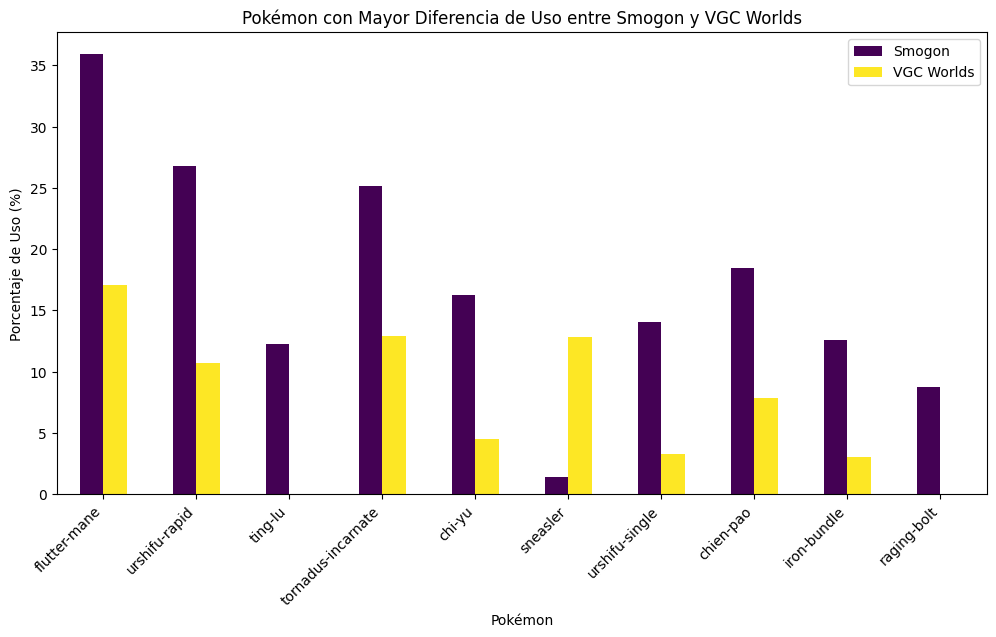

In [89]:
# Calcular diferencia absoluta de uso
df["Usage_Difference"] = abs(df["Avg_Smogon_Usage"] - df["Avg_Worlds_Usage"])

# Seleccionar los 10 Pokémon con mayor diferencia de uso
top_diff = df.nlargest(10, "Usage_Difference")[["name", "Avg_Smogon_Usage", "Avg_Worlds_Usage"]]

# Configurar gráfico
plt.figure(figsize=(12, 6))
top_diff.set_index("name").plot(kind="bar", stacked=False, colormap="viridis", figsize=(12, 6))
plt.ylabel("Porcentaje de Uso (%)")
plt.xlabel("Pokémon")
plt.title("Pokémon con Mayor Diferencia de Uso entre Smogon y VGC Worlds")
plt.xticks(rotation=45, ha="right")
plt.legend(["Smogon", "VGC Worlds"])

# Mostrar gráfico
plt.show()


📌 ¿Qué representa?

Este gráfico muestra los Pokémon que tienen la mayor diferencia de uso entre los dos formatos.

📌 Interpretación:

Si un Pokémon aparece en la parte más alta del histograma, significa que su diferencia de uso entre Smogon y VGC es enorme.
Nos permite identificar qué Pokémon son exclusivos de cada formato y cuáles son universales.

📌 ¿Qué esperar en los datos?

Algunos Pokémon solo tienen un uso competitivo en VGC, mientras que en Smogon son irrelevantes (y viceversa).
Nos permite ver qué Pokémon son "especialistas" en cada formato.

## 📈 Comparación del uso de Pokémon legendarios vs no legendarios

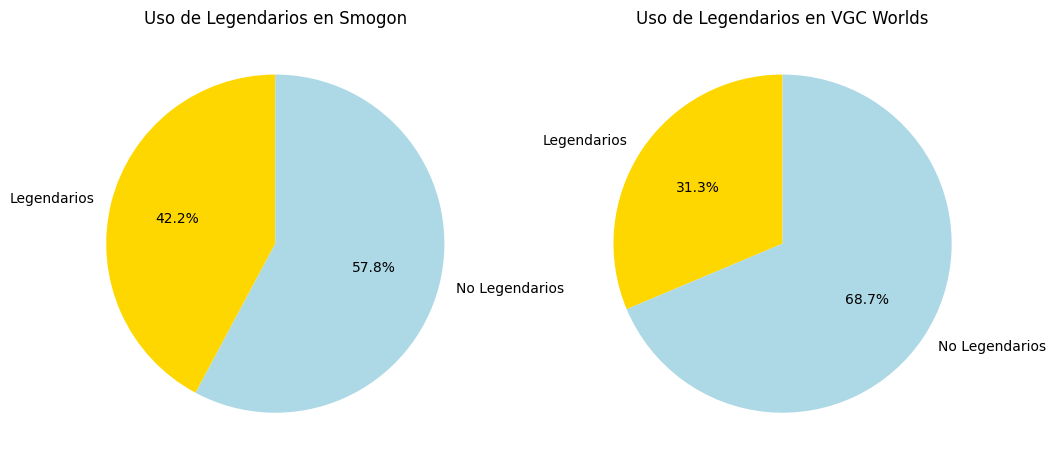

In [90]:
# Agrupar Pokémon por su categoría (Legendario o No Legendario)
legendarios_smogon = df[df["legendary"] == True]["Avg_Smogon_Usage"].sum()
no_legendarios_smogon = df[df["legendary"] == False]["Avg_Smogon_Usage"].sum()

legendarios_vgc = df[df["legendary"] == True]["Avg_Worlds_Usage"].sum()
no_legendarios_vgc = df[df["legendary"] == False]["Avg_Worlds_Usage"].sum()

# Crear datos para graficar
labels = ["Legendarios", "No Legendarios"]
smogon_values = [legendarios_smogon, no_legendarios_smogon]
vgc_values = [legendarios_vgc, no_legendarios_vgc]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de pastel Smogon
axs[0].pie(smogon_values, labels=labels, autopct="%1.1f%%", colors=["gold", "lightblue"], startangle=90)
axs[0].set_title("Uso de Legendarios en Smogon")

# Gráfico de pastel VGC Worlds
axs[1].pie(vgc_values, labels=labels, autopct="%1.1f%%", colors=["gold", "lightblue"], startangle=90)
axs[1].set_title("Uso de Legendarios en VGC Worlds")

plt.show()


📌 ¿Qué representa?

Este gráfico de pastel nos permite ver qué porcentaje del metajuego está compuesto por Pokémon legendarios y no legendarios en cada formato.

📌 Interpretación:

En VGC, es común ver una alta presencia de Pokémon legendarios porque suelen estar permitidos en los torneos oficiales.
En Smogon, los Pokémon legendarios suelen estar restringidos a ciertos tiers, lo que significa que su uso puede ser menor.
Si en Smogon hay más Pokémon no legendarios, significa que el metajuego tiene más diversidad de opciones.

## 📈 Comparación del uso de Pokémon por tipo (Smogon vs VGC Worlds)

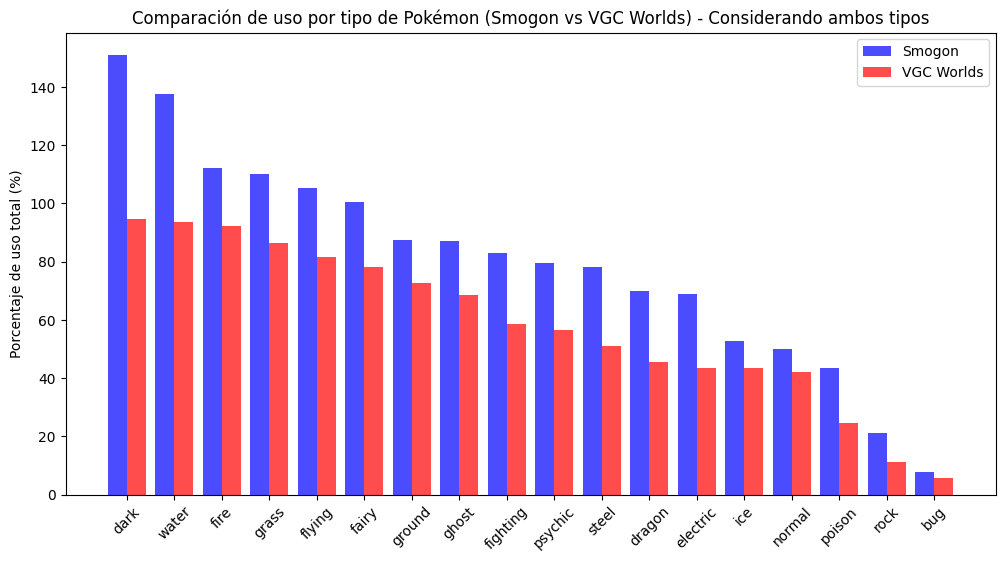

In [91]:
# Crear una nueva columna con los dos tipos combinados
df_melted = df.melt(id_vars=["Avg_Smogon_Usage", "Avg_Worlds_Usage"], value_vars=["type1", "type2"], var_name="TypeColumn", value_name="Type")

# Excluir "NoType"
df_melted = df_melted[df_melted["Type"] != "No_type"]


# Agrupar por tipo y sumar el uso en ambos formatos
tipo_smogon = df_melted.groupby("Type")["Avg_Smogon_Usage"].sum()
tipo_vgc = df_melted.groupby("Type")["Avg_Worlds_Usage"].sum()

# Ordenar tipos por uso total
tipo_smogon = tipo_smogon.sort_values(ascending=False)
tipo_vgc = tipo_vgc.sort_values(ascending=False)

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
indices = range(len(tipo_smogon))

ax.bar(indices, tipo_smogon, width=bar_width, label="Smogon", color="blue", alpha=0.7)
ax.bar([i + bar_width for i in indices], tipo_vgc, width=bar_width, label="VGC Worlds", color="red", alpha=0.7)

ax.set_xticks([i + bar_width / 2 for i in indices])
ax.set_xticklabels(tipo_smogon.index, rotation=45)
ax.set_ylabel("Porcentaje de uso total (%)")
ax.set_title("Comparación de uso por tipo de Pokémon (Smogon vs VGC Worlds) - Considerando ambos tipos")
ax.legend()

plt.show()

📌 ¿Qué representa?

Este gráfico de barras muestra qué tipos de Pokémon son los más usados en cada formato.

📌 Interpretación:

Si un tipo tiene barras altas, significa que es muy popular en ese formato.
Podemos ver si hay diferencias entre Smogon y VGC en términos de qué tipos dominan.
Nos permite ver tendencias del metajuego basadas en tipos de Pokémon.

📌 ¿Qué esperar en los datos?

En VGC, los tipos como Agua, Dragón y Acero suelen ser comunes.
En Smogon, los tipos como Tierra, Fantasma y Eléctrico pueden ser más populares.

# 🏆 Conclusión del Análisis de Uso en Competitivo Pokémon (Smogon vs VGC Worlds) 🎮

A lo largo de este análisis, hemos explorado diferentes aspectos del uso de los Pokémon en los formatos competitivos de Smogon Showdown y VGC Worlds a través de múltiples visualizaciones. Cada una de estas nos ha permitido identificar patrones, tendencias y diferencias clave en ambos entornos de juego. A continuación, resumimos los hallazgos más importantes:

### 📊 1. Top 10 Pokémon más usados en Smogon y VGC (Histograma)

🔹 En este gráfico, se observó que los Pokémon más usados en Smogon tienden a ser aquellos con fuertes estadísticas ofensivas y versatilidad estratégica.

🔹 En VGC, el uso está más influenciado por factores como sinergias de equipo, habilidades de soporte y acceso a estrategias de control del campo, lo que explica por qué algunos Pokémon tienen alto uso en este formato, pero son poco populares en Smogon.

### ⚖️ 2. Comparación Smogon vs. VGC (Scatter Plot)

🔹 Este gráfico permitió comparar directamente el uso de cada Pokémon en ambos formatos.

🔹 Se evidenció que muchos Pokémon con altas tasas de uso en VGC tienen poco uso en Smogon, y viceversa.

🔹 Pokémon como Incineroar y Amoonguss destacan en VGC debido a sus habilidades de soporte, mientras que en Smogon dominan Pokémon con mayor autonomía en batalla.

### 🏆 3. Comparación de los Pokémon más dominantes en cada formato (Histograma)

🔹 Se identificaron Pokémon que han dominado ambos formatos en los últimos años.

🔹 En Smogon, los Pokémon más usados tienden a ser ofensivos y con buenos matchups generales.

🔹 En VGC, los más usados suelen ser aquellos que pueden manipular el campo de batalla con habilidades y estrategias de equipo.

### 🎯 4. Relación entre uso en Smogon y VGC Worlds (Gráfico de dispersión)

🔹 Se exploró la relación entre el uso de Pokémon en ambos formatos, evidenciando una baja correlación entre ellos.

🔹 Esto confirma que el metajuego en Smogon y VGC es completamente diferente, lo que significa que la popularidad de un Pokémon en un formato no garantiza su relevancia en el otro.

### 📉 5. Comparación de Pokémon con mayores diferencias de uso entre Smogon y VGC (Histograma)

🔹 En esta visualización, se analizaron los Pokémon con las mayores diferencias de uso entre los dos formatos.

🔹 Pokémon como Zacian-Crowned y Kyogre dominan el VGC debido a su poder en batallas dobles, mientras que en Smogon tienen uso limitado por restricciones en sus formatos.

🔹 Del mismo modo, Pokémon muy utilizados en Smogon como Heatran o Ferrothorn no siempre logran el mismo éxito en VGC debido a la dinámica de batallas dobles.

### 🛡️ 6. Comparación del uso de Pokémon legendarios vs no legendarios (Gráfico de pastel)

🔹 En Smogon, los Pokémon legendarios tienen uso limitado debido a las restricciones impuestas por los formatos OU, UU, etc.

🔹 En VGC, los legendarios tienen un protagonismo mucho mayor, ya que en varias temporadas y torneos oficiales han estado permitidos en las competiciones, lo que los convierte en opciones dominantes.

🔹 Esto demuestra cómo las reglas de cada formato afectan directamente el uso de los Pokémon.

### 🌟 7. Comparación del uso de Pokémon por tipo (Smogon vs VGC Worlds)

🔹 Se analizaron las diferencias en la distribución de tipos entre ambos formatos.

🔹 En Smogon, los Pokémon de tipo Acero, Dragón y Tierra son muy utilizados debido a su combinación de resistencias y cobertura.

🔹 En VGC, tipos como Fuego, Hada y Agua tienen un mayor protagonismo, en parte debido a estrategias basadas en Clima y movimientos de soporte.

🔹 Se evidenció que ciertos tipos tienen una gran presencia en ambos formatos, mientras que otros son más exclusivos de un solo entorno competitivo.

## 📌 Conclusión General 📢

A lo largo de este análisis, ha quedado claro que el competitivo en Smogon y en VGC son mundos completamente diferentes en términos de qué Pokémon dominan y cómo se utilizan.

📌 En Smogon, el metajuego se basa en batallas individuales donde el balance de poder se distribuye en base a formatos regulados por tiers.

📌 En VGC, el enfoque cambia a batallas dobles, donde las sinergias de equipo, habilidades de soporte y manipulación del campo juegan un papel crucial.

En resumen:

🔥 Smogon favorece Pokémon con alto rendimiento individual y opciones tácticas de uno contra uno.

⚔️ VGC prioriza estrategias colectivas, aprovechando habilidades como Intimidate, Fake Out y Trick Room.

📊 Los Pokémon más usados en cada formato varían considerablemente, demostrando que la estrategia competitiva depende totalmente del entorno de juego.

Este análisis proporciona una visión más clara de cómo los formatos competitivos influyen en el uso de Pokémon y puede servir como una base para futuras investigaciones y optimización de estrategias en ambos mundos. 🎮🏆🚀